# Import Libraries and Load Data

In [13]:
import pandas as pd
import numpy as np

# Read data
file_path = '../data/processed/member_summary.csv'
df = pd.read_csv(file_path)

print(f"Data loaded successfully!")
print(f"Total records: {len(df):,}")
print(f"\nFirst few rows:")
print(df.head())

Data loaded successfully!
Total records: 96,086

First few rows:
   Member_ID  Total_Transactions  Fraud_Adjustments  Category
0  100003077                  13                  0  no_fraud
1  100012328                  18                  0  no_fraud
2  100021478                   3                  0  no_fraud
3   10002800                   1                  0  no_fraud
4  100028110                   1                  0  no_fraud


# Set Threshold and Basic Statistics


In [14]:
# Custom threshold n (you can modify this value)
n = 20

# Calculate statistics
total_count = len(df)
above_n = len(df[df['Total_Transactions'] >= n])
below_n = len(df[df['Total_Transactions'] < n])

# Calculate ratios
above_ratio = (above_n / total_count) * 100
below_ratio = (below_n / total_count) * 100

print(f"Threshold set to: {n}")
print(f"Records >= {n}: {above_n:,} ({above_ratio:.2f}%)")
print(f"Records < {n}: {below_n:,} ({below_ratio:.2f}%)")

Threshold set to: 20
Records >= 20: 49,036 (51.03%)
Records < 20: 47,050 (48.97%)


# Distribution by Transaction Ranges

In [15]:
print(f"{'='*70}")
print("Distribution by Transaction Ranges:")
print(f"{'='*70}")

bins = [0, 1000, 2000, 3000, 4000, 5000, 6000, np.inf]
labels = ['0-1K', '1K-2K', '2K-3K', '3K-4K', '4K-5K', '5K-6K', '6K+']
df['Range'] = pd.cut(df['Total_Transactions'], bins=bins, labels=labels, right=False)
range_distribution = df['Range'].value_counts().sort_index()
range_pct = (range_distribution / total_count * 100).round(2)

range_table = pd.DataFrame({
    'Transaction Range': range_distribution.index,
    'Count': range_distribution.values,
    'Percentage': [f"{pct:.2f}%" for pct in range_pct.values]
})
print(range_table.to_string(index=False))

Distribution by Transaction Ranges:
Transaction Range  Count Percentage
             0-1K  94286     98.13%
            1K-2K   1546      1.61%
            2K-3K    208      0.22%
            3K-4K     28      0.03%
            4K-5K     12      0.01%
            5K-6K      5      0.01%
              6K+      1      0.00%


# Visualization - Distribution Histogram

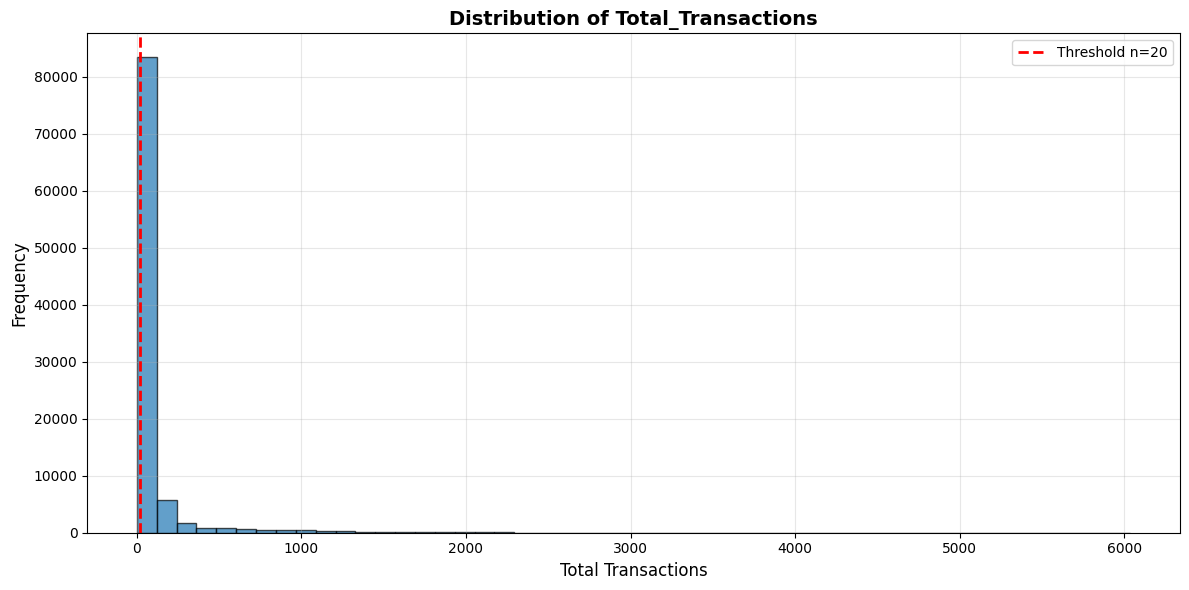

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.hist(df['Total_Transactions'], bins=50, edgecolor='black', alpha=0.7)
plt.axvline(n, color='red', linestyle='--', linewidth=2, label=f'Threshold n={n}')
plt.xlabel('Total Transactions', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Total_Transactions', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Test Different Thresholds

In [17]:
# Test multiple thresholds
thresholds = [30, 40, 50, 60]
results = []

for threshold in thresholds:
    above = len(df[df['Total_Transactions'] >= threshold])
    ratio = (above / total_count) * 100
    results.append({
        'Threshold': threshold,
        'Count >= Threshold': above,
        'Percentage': f"{ratio:.2f}%"
    })

comparison_df = pd.DataFrame(results)
print(f"{'='*70}")
print("Comparison Across Different Thresholds:")
print(f"{'='*70}")
print(comparison_df.to_string(index=False))

Comparison Across Different Thresholds:
 Threshold  Count >= Threshold Percentage
        30               41129     42.80%
        40               35139     36.57%
        50               30478     31.72%
        60               26552     27.63%
